In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import *

In [14]:
df = pd.read_csv('no_shows_cleaned.csv')

In [15]:
df.head(10)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0
5,F,76,0,1,0,0,0,0,0
6,F,23,0,0,0,0,0,0,1
7,F,39,0,0,0,0,0,0,1
8,F,21,0,0,0,0,0,0,0
9,F,19,0,0,0,0,0,0,0


In [16]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000,110502.000000
mean,37.094596,0.098224,0.197291,0.071881,0.030189,0.022253,0.321035,0.201870
std,23.109590,0.297619,0.397955,0.258292,0.171109,0.161561,0.466876,0.401397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Histogram

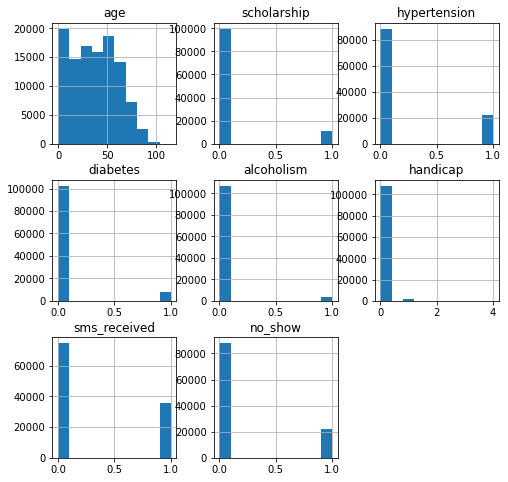

In [21]:
df_cleaned=pd.read_csv('no_shows_cleaned.csv')
df_cleaned.hist(figsize=(8,8));

Percentage of patients that showed up vs that didn't

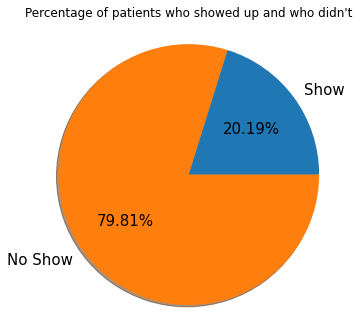

In [25]:
label_Names = ["Show", "No Show"]
data = [df.query('no_show == 1').count()[0], df.query('no_show == 0').count()[0]]
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names, autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);

Does alcoholism affect showing up?

In [17]:
df.alcoholism.value_counts()[1]

3336

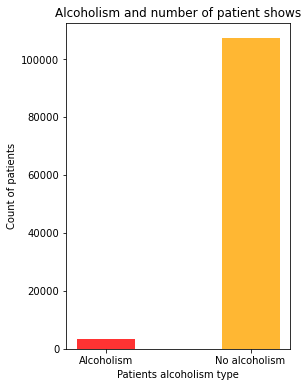

In [20]:
x_axis = ['Alcoholism' , 'No alcoholism']
alcoholism = df.alcoholism.value_counts()[1]
no_alcoholism = df.alcoholism.value_counts()[0]
y_axis = [alcoholism , no_alcoholism]
colors = ['red' , 'orange']
plt.figure(figsize=(4,6),)
plt.bar(x_axis,y_axis, color = colors, width = 0.4,alpha = 0.8 , )
plt.ylabel('Count of patients')
plt.xlabel('Patients alcoholism type')
plt.title('Alcoholism and number of patient shows');

Tallest Males and Females Per Country

Country with Tallest Men (cm): Netherlands at 183.78
Country with Tallest Female (cm): Netherlands at 170.36


Top 5 Countries with Tallest Males

Text(0.5, 0, 'Country Name')

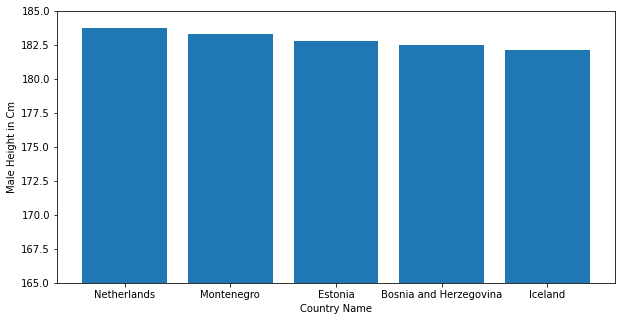

Top 5 Countries with Tallest Females

Text(0.5, 0, 'Country Name')

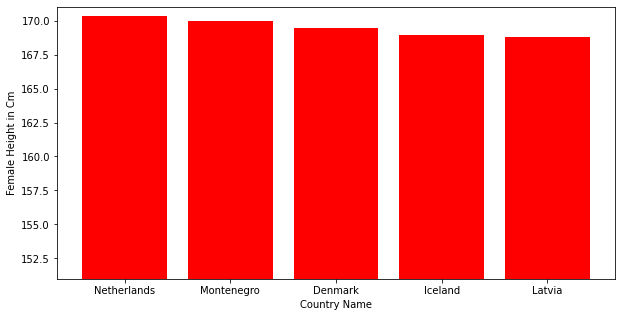

Shortest Males and Females Per Country

Country with Shortest Men (cm): Timor-Leste at 160.13
Country with Shortest Female (cm): Guatemala at 150.91


Top 5 Countries with Shortest Males

Text(0.5, 0, 'Country Name')

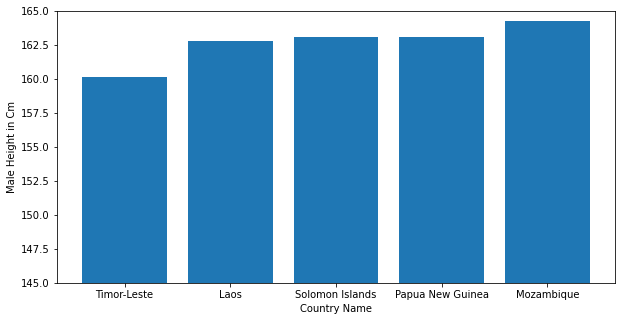

Top 5 Countries with Shortest Females

Text(0.5, 0, 'Country Name')

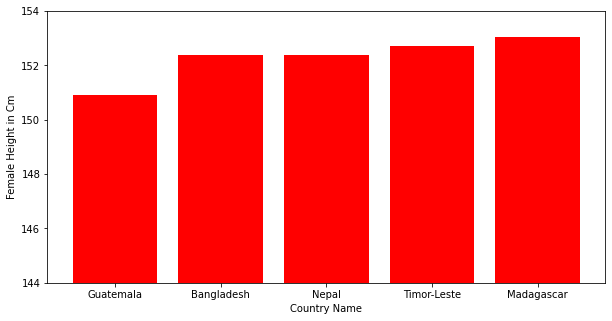

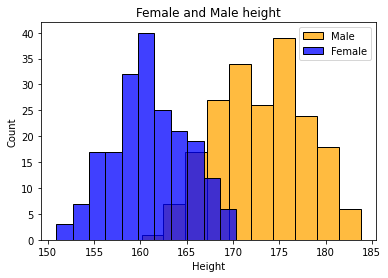